# Nandini Gantayat
**Fundamentals of Interpretable Data Science   
Individual Assignment**  

**Philipp Borchert  
MBD 2022-23**

**Project definition** - Explore and apply an interpretability technique that has not been discussed in class.  
Describe how the technique works and compare it with at least one of the interpretability approaches covered in class.  
Make sure to mention the pros and cons

# INTERPRETABILITY TECHNIQUE - Diverse Counterfactual Explanations (DiCE)


**Motivation behind this technique**-As someone gravitating into sensitive domains like cybersecurity I found Dice to be an efficient technique to address the ethical, regulatory, and trust-related challenges associated with machine learning models. It promotes transparency, fairness, and accountability, while also empowering stakeholders to make informed decisions, identify potential biases, and rectify any issues that may arise.

**Dataset used** - TITANIC  

**Model** - Logistic Regression

**Technique compared** - Feature Importance

Importing necessary libraries

[library documentation](https://interpret.ml/DiCE/index.html)


In [74]:
!pip install dice-ml

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [184]:
#suppressing unnecessary warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


import dice_ml
from dice_ml import Dice


[image source reference](https://github.com/interpretml/DiCE)


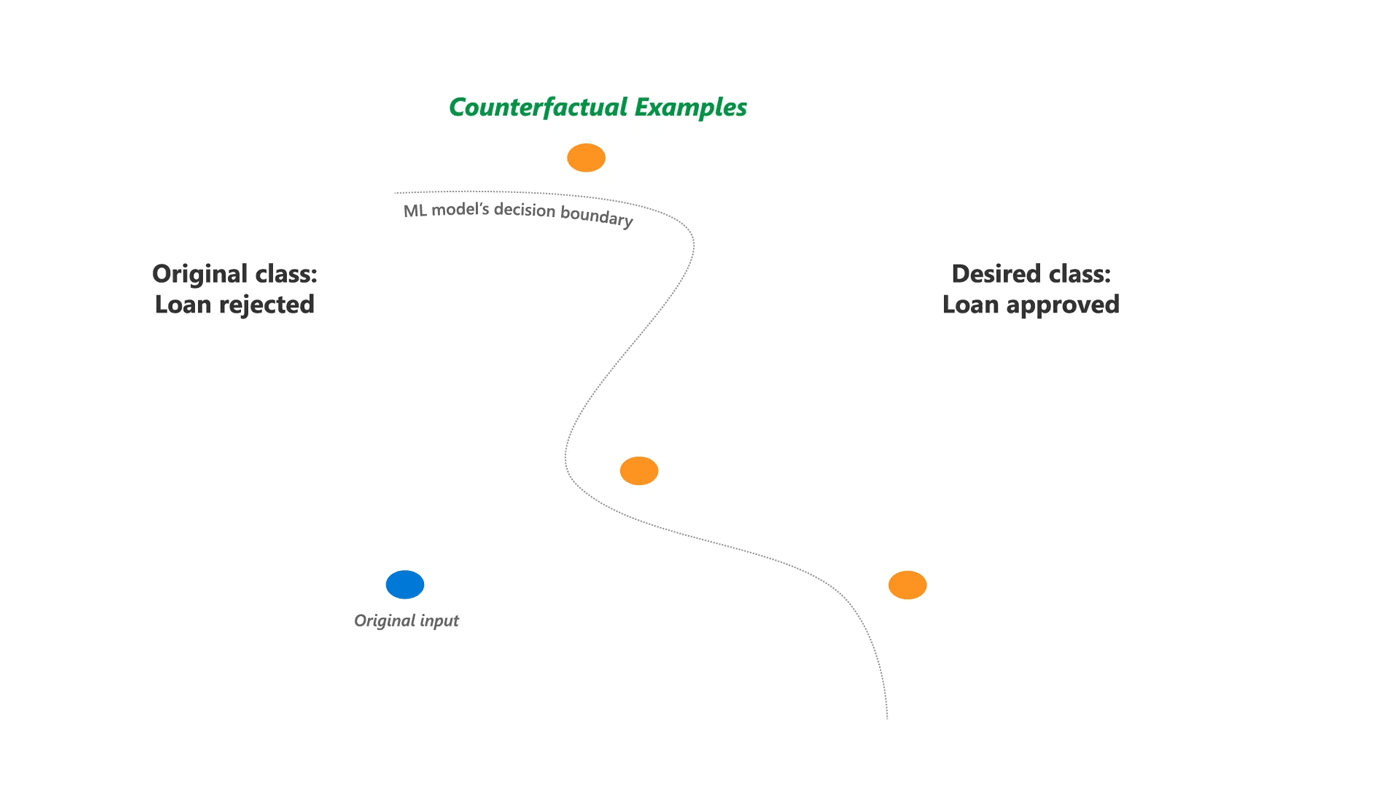

In [76]:
#Visual representation of how counterfactuals work in a model trained for classifying loan approval status. 
#Orange circle represent a counterfactual instance.

Image(filename="C:/Users/ngantayat1/Downloads/Interpretable data science/1_Wf_nstxpjUWPHu8nAte0xQ.gif")


https://christophm.github.io/interpretable-ml-book/counterfactual.html

https://github.com/interpretml/DiCE

https://medium.com/@bijil.subhash/explainable-ai-diverse-counterfactual-explanations-dice-315f058c0364

https://christophm.github.io/interpretable-ml-book/counterfactual.html  

https://www.microsoft.com/en-us/research/blog/open-source-library-provides-explanation-for-machine-learning-through-diverse-counterfactuals/

# Intuitive understanding of dice
A counterfactual explanation describes a causal situation in the form: “If X had not occurred, Y would not have occurred” . For example: “If I hadn’t taken a sip of this hot coffee, I wouldn’t have burned my tongue”. Event Y is that I burned my tongue; cause X is that I had a hot coffee.

DiCE implements counterfactual (CF) explanations that provide such information by showing feature-perturbed versions of the same case… In other words, it provides “what-if” explanations for model output and can be a useful complement to other explanation methods, both for end-users and model developers

**Counterfactual Explanations**: DICE generates counterfactual explanations for individual instances in the Titanic dataset. These explanations are hypothetical input instances that, if applied to the logistic regression model, would change the predicted outcome (survived or not survived). The counterfactual explanations help understand how changes in the input variables impact the prediction, providing insights into the factors influencing survival predictions for specific passengers.  

**Insights into Survival Factors**: The Titanic dataset is well-known for its historical significance, representing the survival of passengers during the tragic event. By using DICE with logistic regression, stakeholders can gain insights into the factors that played a significant role in determining survival. The counterfactual explanations shed light on the importance of different features and how they contribute to the prediction of survival, enabling a deeper understanding of the underlying patterns and dynamics of the dataset.

**dataset description**

Pclass (categorical variable) - ticket class, which takes the value 1, 2 or 3  
Sex (categorical variable)- Male or Female  
Age (numerical variable) - continuous variable  
SibSp (categorical variable) - number of siblings or spouses on board  
Parch (categorical variable) - number of parents or children on board  
Fare (numerical variable) - continuous variable  
Survived (categorical variable) - not survived or survived, which takes the value 0 or 1

In [161]:
train=pd.read_csv("C:/Users/ngantayat1/Downloads/Interpretable data science/Data/Titanic/train.csv")

In [164]:
# drop rows containing NA values
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) #dropping columns that are not useful for classifcation
train = train.dropna(axis=0) #dropping nan rows

le = preprocessing.LabelEncoder() #encoding the categorical variables into numericals
train['Sex'] = le.fit_transform(train['Sex']) #{'female': 0, 'male': 1}
train['Embarked'] = le.fit_transform(train['Embarked']) #{'C': 0, 'Q': 1, 'S': 2}

X = train.iloc[:, 1:7] #training features
y = train.iloc[:, 0] #label

train_dataset, test_dataset, y_train, y_test = train_test_split(train, y, test_size=0.3, stratify=y, random_state=42)

X_train = train_dataset.drop('Survived', axis=1)
X_test = test_dataset.drop('Survived', axis=1)

In [165]:
#model training
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [166]:
train_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
3,1,3,0,4.00,1,1,16.7000,2
119,0,1,1,36.00,0,0,40.1250,0
96,1,1,0,35.00,1,0,90.0000,2
38,1,1,1,38.00,1,0,90.0000,2
55,1,1,1,0.92,1,2,151.5500,2
...,...,...,...,...,...,...,...,...
118,1,1,0,39.00,1,1,110.8833,0
173,1,1,0,39.00,1,1,83.1583,0
180,1,1,0,56.00,0,1,83.1583,0
74,1,1,0,60.00,1,0,75.2500,0


In [167]:
d = dice_ml.Data(dataframe=train_dataset,continuous_features=['Age', 'Fare'], 
                 outcome_name='Survived')
m = dice_ml.Model(model=model, backend="sklearn")
exp = dice_ml.Dice(d, m, method="random")

In [174]:
e = exp.generate_counterfactuals(X_test[0:1], total_CFs=5, desired_class="opposite")
e.visualize_as_dataframe(show_only_changes=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.21it/s]

Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,39.0,1,1,79.650002,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,33.3,1.0,1.0,80.00000000000018,2.0,0
1,1.0,1,-,1.0,1.0,28.5,2.0,0
2,1.0,1,66.1,1.0,1.0,80.00000000000018,2.0,0
3,2,1,-,1.0,1.0,80.00000000000018,2.0,0
4,1.0,0.0,67.4,1.0,4,80.00000000000018,2.0,0


In [177]:
dice_exp = exp.generate_counterfactuals(X_test,
                total_CFs=4, desired_class="opposite",
                proximity_weight=1.5, diversity_weight=1.0)

100%|██████████████████████████████████████████████████████████████████████████████████| 55/55 [00:40<00:00,  1.34it/s]


In [178]:
dice_exp.visualize_as_dataframe(show_only_changes=True)

Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,39.0,1,1,79.650002,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,-,1.0,1.0,321.01,2.0,0
1,1.0,1,46.6,1.0,1.0,80.00000000000018,2.0,0
2,1.0,1,-,-,1.0,80.00000000000018,2.0,0
3,1.0,1,-,1.0,2,80.00000000000018,2.0,0


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,65.0,0,1,61.979198,0,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,27.1,0.0,1.0,425.31,0.0,1
1,1.0,1.0,10.5,0.0,-,62.00919999999999,0.0,1
2,1.0,0,2.9,0.0,1.0,62.00919999999999,0.0,1
3,1.0,1.0,12.3,0.0,1.0,62.00919999999999,0.0,1


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,33.0,0,0,5.0,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,53.9,0.0,0.0,-,2.0,0
1,1.0,1.0,-,2,2,-,2.0,0
2,3,1.0,15.8,0.0,0.0,-,2.0,0
3,1.0,1.0,-,-,4,-,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,28.0,0,0,35.5,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,-,0.0,2,36.0099999999999,0,0
1,1.0,1.0,38.0,0.0,0.0,36.0099999999999,-,0
2,1.0,1.0,45.5,0.0,0.0,36.0099999999999,1,0
3,1.0,-,42.9,0.0,0.0,36.0099999999999,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,44.0,2,0,90.0,1,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,-,2.0,4,-,1.0,0
1,1.0,1.0,-,2.0,2,27.15,1.0,0
2,1.0,1.0,65.1,2.0,0.0,168.18,1.0,0
3,1.0,1.0,61.9,2.0,0.0,360.79,1.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.266701,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,-,1.0,0.0,79.00670000000038,1,0
1,1.0,1,-,1.0,0.0,79.00670000000038,0.0,0
2,2,0.0,-,1.0,4,79.00670000000038,0.0,0
3,1.0,1,-,1.0,0.0,190.28,0.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,36.0,0,1,512.329224,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,-,0.0,1.0,150.24,0.0,0
1,1.0,1.0,-,0.0,2,137.47,0.0,0
2,2,1.0,-,0.0,1.0,318.16,0.0,0
3,1.0,1.0,-,0.0,1.0,49.92,0.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,40.0,0,0,153.462494,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,-,0.0,4,154.00249999999951,2.0,0
1,1.0,1,62.8,0.0,0.0,154.00249999999951,2.0,0
2,1.0,1,-,0.0,0.0,34.52,2.0,0
3,3,0.0,67.9,0.0,0.0,154.00249999999951,2.0,0


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,51.0,0,0,26.549999,2,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,0,3.5,0.0,0.0,27.00000000000007,2.0,1
1,2,1.0,14.6,0.0,0.0,27.00000000000007,2.0,1
2,1.0,-,11.9,0.0,0.0,27.00000000000007,2.0,1
3,1.0,0,-,-,0.0,27.00000000000007,2.0,1


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,31.0,0,2,164.866699,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0.0,41.8,0.0,2.0,165.00669999999988,2.0,0
1,2,0.0,64.2,0.0,2.0,165.00669999999988,2.0,0
2,1.0,1,-,1,2.0,165.00669999999988,2.0,0
3,1.0,1,-,0.0,4,165.00669999999988,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,25.0,1,2,151.550003,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,69.3,1.0,2.0,152.0099999999996,2.0,0
1,1.0,1,-,1.0,2.0,22.8,2.0,0
2,1.0,1,-,1.0,2.0,81.66,2.0,0
3,2,1,-,1.0,2.0,152.0099999999996,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,16.0,0,0,86.5,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0.0,68.9,0.0,0.0,87.00000000000026,2.0,0
1,1.0,1,65.6,0.0,0.0,87.00000000000026,2.0,0
2,1.0,1,44.2,0.0,0.0,87.00000000000026,2.0,0
3,1.0,0.0,62.6,0.0,4,87.00000000000026,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,40.0,0,0,31.0,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1.0,-,0.0,0.0,241.07,0.0,0
1,1.0,1.0,-,0.0,4,-,2,0
2,3,1.0,-,0.0,0.0,42.72,0.0,0
3,1.0,-,-,0.0,0.0,-,2,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,21.0,0,1,77.287498,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,64.5,0.0,1.0,78.00750000000036,2.0,0
1,1.0,1.0,39.1,0.0,1.0,37.73,2.0,0
2,1.0,1.0,-,0.0,2,128.75,2.0,0
3,3,1.0,-,3,1.0,78.00750000000036,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,17.0,1,0,57.0,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,0.0,58.5,1.0,4,-,2.0,0
1,1.0,1,66.1,1.0,0.0,-,2.0,0
2,1.0,1,60.4,1.0,0.0,-,2.0,0
3,1.0,1,46.6,1.0,0.0,-,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,35.0,0,0,26.2875,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,47.4,0.0,0.0,27.007500000000114,2.0,0
1,1.0,1.0,65.2,-,0.0,27.007500000000114,2.0,0
2,2,1.0,-,1,0.0,27.007500000000114,2.0,0
3,1.0,1.0,42.4,0.0,0.0,154.79,2.0,0


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,40.0,0,0,0.0,2,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,0,55.1,0.0,0.0,-,2.0,1
1,1.0,1.0,-,0.0,0.0,280.0,2.0,1
2,-,1.0,-,2,0.0,-,2.0,1
3,1.0,1.0,-,1,0.0,144.62,2.0,1


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,24.0,0,0,69.300003,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,50.4,0.0,0.0,70.00000000000036,0.0,0
1,1.0,0.0,62.4,0.0,4,70.00000000000036,0.0,0
2,3,0.0,69.2,0.0,0.0,70.00000000000036,0.0,0
3,1.0,1,49.2,0.0,0.0,70.00000000000036,0.0,0


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,37.0,0,1,29.700001,0,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,29.0,0.0,1.0,30.000000000000046,0.0,1
1,1.0,1.0,7.1,0.0,1.0,30.000000000000046,0.0,1
2,1.0,1.0,-,0.0,1.0,294.52,0.0,1
3,1.0,1.0,-,0.0,1.0,397.87,0.0,1


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,22.0,0,1,55.0,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0.0,56.3,0.0,1.0,-,2.0,0
1,1.0,1,67.4,0.0,1.0,-,2.0,0
2,1.0,1,54.9,0.0,1.0,-,2.0,0
3,1.0,1,41.6,0.0,1.0,-,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,58.0,0,0,26.549999,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,-,0.0,0.0,356.94,2.0,0
1,1.0,1,-,0.0,0.0,27.00000000000007,2.0,0
2,3,0.0,-,0.0,0.0,71.62,2.0,0
3,3,-,-,0.0,0.0,27.00000000000007,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,38.0,0,0,227.524994,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,0.0,56.8,0.0,4,228.00499999999957,0.0,0
1,1.0,1,70.5,0.0,0.0,228.00499999999957,0.0,0
2,3,0.0,68.7,0.0,0.0,228.00499999999957,0.0,0
3,1.0,0.0,67.2,0.0,4,228.00499999999957,0.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,24.0,0,2,16.700001,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,0.0,52.5,0.0,2.0,17.000000000000046,2.0,0
1,3.0,1,-,0.0,-,17.000000000000046,2.0,0
2,3.0,0.0,55.7,2,2.0,17.000000000000046,2.0,0
3,3.0,0.0,40.5,0.0,2.0,47.76,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,25.0,1,0,55.4417,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1.0,65.8,1.0,0.0,56.001699999999886,0.0,0
1,1.0,1.0,47.4,1.0,0.0,56.001699999999886,2,0
2,1.0,1.0,65.0,0,0.0,56.001699999999886,0.0,0
3,1.0,1.0,68.0,1.0,-,56.001699999999886,0.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,18.0,1,0,108.900002,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,43.4,1.0,4,109.00000000000006,0.0,0
1,1.0,1.0,64.4,1.0,4,109.00000000000006,0.0,0
2,1.0,1.0,54.7,1.0,0.0,109.00000000000006,2,0
3,1.0,1.0,62.2,1.0,-,109.00000000000006,0.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,0,4.0,2,1,39.0,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2.0,0.0,70.8,2.0,1.0,-,2.0,0
1,2.0,0.0,61.5,0,1.0,-,2.0,0
2,2.0,1,67.0,2.0,1.0,-,2.0,0
3,2.0,0.0,70.9,2.0,1.0,-,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,29.0,1,0,66.599998,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,-,1.0,4,67.0000000000002,1,0
1,2,1.0,33.3,1.0,0.0,67.0000000000002,2.0,0
2,1.0,1.0,40.0,1.0,1,67.0000000000002,2.0,0
3,1.0,1.0,-,1.0,2,67.0000000000002,2.0,0


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,36.0,0,0,26.387501,2,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,-,0.0,0.0,402.81,0,1
1,1.0,1.0,1.4,0.0,0.0,27.007500000000096,2.0,1
2,1.0,0,50.8,0.0,0.0,27.007500000000096,2.0,1
3,1.0,0,2.9,0.0,0.0,27.007500000000096,2.0,1


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,47.0,0,0,38.5,2,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,14.4,0.0,0.0,39.0099999999999,2.0,1
1,1.0,1.0,22.0,0.0,0.0,39.0099999999999,2.0,1
2,1.0,0,-,0.0,0.0,193.47,2.0,1
3,1.0,0,-,0.0,0.0,80.28,2.0,1


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,52.0,1,1,79.650002,2,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,21.8,1.0,1.0,80.00000000000018,2.0,1
1,1.0,1.0,17.0,1.0,1.0,224.14,2.0,1
2,1.0,0,-,1.0,1.0,119.38,2.0,1
3,1.0,1.0,5.6,1.0,1.0,23.41,2.0,1


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,61.0,0,0,33.5,2,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,0,-,0.0,0.0,302.85,2.0,1
1,1.0,1.0,18.7,0.0,0.0,34.0099999999999,-,1
2,1.0,0,12.7,0.0,0.0,34.0099999999999,2.0,1
3,1.0,1.0,20.1,-,0.0,34.0099999999999,2.0,1


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,36.0,1,2,120.0,2,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,-,-,1.0,0,-,2.0,1
1,1.0,1.0,23.1,1.0,2.0,-,2.0,1
2,1.0,0,28.0,1.0,2.0,-,2.0,1
3,1.0,1.0,2.7,1.0,2.0,-,2.0,1


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,21.0,2,2,262.375,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0.0,68.2,2.0,2.0,263.0049999999994,0.0,0
1,3,1,-,2.0,2.0,263.0049999999994,0.0,0
2,1.0,1,62.5,2.0,2.0,263.0049999999994,0.0,0
3,1.0,0.0,68.0,2.0,4,263.0049999999994,0.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,14.0,1,2,120.0,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,66.5,1.0,2.0,-,2.0,0
1,3,0.0,54.1,1.0,2.0,-,2.0,0
2,1.0,1,40.3,1.0,2.0,-,2.0,0
3,3,0.0,61.1,1.0,2.0,-,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,0,29.0,0,0,10.5,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0.0,-,0.0,4,11.00999999999999,2.0,0
1,2.0,1,-,0.0,0.0,109.76,2.0,0
2,2.0,1,-,0.0,0.0,11.00999999999999,-,0
3,2.0,1,55.6,0.0,0.0,11.00999999999999,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,19.0,0,0,30.0,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,39.7,0.0,0.0,-,2.0,0
1,3,0.0,60.4,0.0,0.0,-,2.0,0
2,1.0,1,46.7,0.0,0.0,-,2.0,0
3,1.0,1,69.8,0.0,0.0,-,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,33.0,1,0,53.099998,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,68.4,1.0,0.0,54.00999999999982,2.0,0
1,3,0.0,65.5,1.0,0.0,54.00999999999982,2.0,0
2,2,1,-,1.0,0.0,54.00999999999982,2.0,0
3,3,0.0,-,1.0,4,54.00999999999982,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,3.0,1,1,26.0,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2.0,1.0,35.2,1.0,1.0,-,2.0,0
1,2.0,1.0,24.7,1.0,1.0,-,2.0,0
2,2.0,1.0,57.2,1.0,1.0,307.75,2.0,0
3,2.0,1.0,55.7,3,1.0,-,2.0,0


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,60.0,1,1,79.199997,0,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,37.7,-,1.0,80.00000000000041,0.0,1
1,1.0,1.0,38.6,1.0,1.0,80.00000000000041,0.0,1
2,1.0,0,38.2,1.0,1.0,80.00000000000041,0.0,1
3,1.0,1.0,24.9,1.0,1.0,80.00000000000041,2,1


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,33.0,0,0,86.5,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,0.0,68.6,0.0,2,87.00000000000026,2.0,0
1,1.0,1,68.6,0.0,0.0,87.00000000000026,2.0,0
2,1.0,1,-,0.0,4,87.00000000000026,2.0,0
3,1.0,1,-,0.0,2,87.00000000000026,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,31.0,1,0,57.0,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,56.6,1.0,0.0,-,2.0,0
1,1.0,1.0,58.7,-,0.0,-,2.0,0
2,1.0,1.0,31.00000000000002,1.0,4,-,2.0,0
3,1.0,1.0,56.3,1.0,0.0,294.62,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,1.0,2,1,39.0,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,-,1.0,62.8,2.0,1.0,-,2.0,0
1,2.0,1.0,40.0,2.0,-,-,2.0,0
2,2.0,1.0,46.3,2.0,1.0,-,-,0
3,2.0,-,69.4,2.0,1.0,-,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,35.0,1,0,53.099998,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,55.3,1.0,0.0,54.00999999999982,2.0,0
1,3,0.0,-,1.0,4,54.00999999999982,2.0,0
2,1.0,1,54.6,1.0,0.0,54.00999999999982,2.0,0
3,3,1,-,1.0,0.0,54.00999999999982,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,41.0,0,0,134.5,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,-,0.0,0.0,135.00999999999954,2,0
1,1.0,1,60.9,0.0,0.0,135.00999999999954,0.0,0
2,3,0.0,-,0.0,4,135.00999999999954,0.0,0
3,2,1,-,0.0,0.0,135.00999999999954,0.0,0


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,62.0,0,0,26.549999,2,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,20.8,0.0,0.0,27.00000000000007,2.0,1
1,1.0,1.0,2.8,0.0,0.0,27.00000000000007,0,1
2,2,1.0,1.7,0.0,0.0,27.00000000000007,2.0,1
3,1.0,0,10.1,0.0,0.0,27.00000000000007,2.0,1


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,48.0,1,0,39.599998,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,0.0,64.1,1.0,4,40.00999999999992,0.0,0
1,1.0,1,-,1.0,0.0,40.00999999999992,1,0
2,1.0,1,-,1.0,0.0,40.00999999999992,-,0
3,1.0,1,-,1.0,2,40.00999999999992,0.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,36.0,1,0,78.849998,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,68.1,1.0,2,79.00000000000007,2.0,0
1,3,1.0,22.0,1.0,0.0,79.00000000000007,2.0,0
2,1.0,1.0,54.5,1.0,0.0,459.91,2.0,0
3,1.0,1.0,49.8,-,0.0,79.00000000000007,2.0,0


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,31.0,1,0,52.0,2,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,54.2,1.0,0.0,-,2.0,0
1,1.0,1.0,69.7,1.0,0.0,-,2.0,0
2,1.0,1.0,-,1.0,4,104.02,2.0,0
3,1.0,1.0,45.9,1.0,0.0,-,2.0,0


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,42.0,0,0,7.65,2,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1.0,1.4,1,0.0,8.009999999999993,2.0,1
1,3.0,0,-,2,0.0,8.009999999999993,2.0,1
2,3.0,1.0,6.1,-,0.0,8.009999999999993,2.0,1
3,3.0,0,-,0.0,0.0,195.9,2.0,1


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,54.0,0,1,77.287498,2,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,-,27.0,0.0,1.0,78.00750000000036,2.0,1
1,-,1.0,6.7,0.0,1.0,78.00750000000036,2.0,1
2,1.0,1.0,18.4,0.0,1.0,78.00750000000036,1,1
3,1.0,1.0,12.2,0.0,1.0,78.00750000000036,2.0,1


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,49.0,1,0,56.929199,0,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,-,2,0.0,171.22,0.0,1
1,1.0,1.0,21.4,3,0.0,57.009199999999986,0.0,1
2,1.0,1.0,41.0,1.0,0.0,57.009199999999986,0.0,1
3,1.0,1.0,-,1.0,0.0,197.69,0.0,1


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,40.0,1,1,134.5,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,53.8,1.0,1.0,135.00999999999954,0.0,0
1,1.0,1,-,1.0,-,135.00999999999954,0.0,0
2,3,1,-,1.0,1.0,135.00999999999954,0.0,0
3,1.0,1,-,1.0,1.0,15.62,0.0,0


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,80.0,0,0,30.0,2,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,25.4,0.0,0.0,-,0,1
1,1.0,1.0,10.6,0.0,0.0,382.0,2.0,1
2,1.0,0,-,0.0,0.0,448.62,2.0,1
3,1.0,1.0,23.0,0.0,0.0,-,2.0,1


Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,50.0,1,0,106.425003,0,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,-,1.0,0.0,221.41,0.0,1
1,1.0,0,34.4,1.0,0.0,107.0050000000003,0.0,1
2,2,0,-,1.0,0.0,107.0050000000003,0.0,1
3,1.0,1.0,-,1.0,0.0,422.53,0.0,1


Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,18.0,2,2,262.375,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1,59.2,2.0,2.0,263.0049999999994,0.0,0
1,1.0,1,45.6,2.0,2.0,263.0049999999994,0.0,0
2,3,0.0,64.0,2.0,2.0,263.0049999999994,0.0,0
3,1.0,1,64.1,2.0,2.0,263.0049999999994,0.0,0


In [176]:
e = exp.generate_counterfactuals(X_test[0:2], total_CFs=5, desired_class="opposite", 
                                 features_to_vary=['Age'])
e.visualize_as_dataframe(show_only_changes=True)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.19it/s]

Query instance (original outcome : 1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,39.0,1,1,79.650002,2,1



No counterfactuals found!
Query instance (original outcome : 0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,65.0,0,1,61.979198,0,0



Diverse Counterfactual set (new outcome: 1.0)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,22.3,0.0,1.0,62.00919999999999,0.0,1.0
1,1.0,1.0,8.8,0.0,1.0,62.00919999999999,0.0,1.0
2,1.0,1.0,6.0,0.0,1.0,62.00919999999999,0.0,1.0
3,1.0,1.0,11.3,0.0,1.0,62.00919999999999,0.0,1.0
4,1.0,1.0,29.5,0.0,1.0,62.00919999999999,0.0,1.0


# Interpreting the technique
Starting to notice a trend with Age and Sex. Survival rate is poor among older citizens as well as the sex male has a higher chance of surviving.


# Advantages of DICE

Individual Explanations: DICE provides individual-level explanations by generating counterfactual instances that explain how changes in the input features affect the model's prediction. This allows for a granular understanding of the factors influencing each prediction, providing interpretable insights.

Model-Agnostic: DICE is a model-agnostic method, meaning it can be applied to any machine learning model

Proximity and Diversity: DICE incorporates proximity and diversity weights to generate counterfactual explanations that are both close to the original instance and diverse from each other. This ensures a comprehensive exploration of possible alternative outcomes, improving the robustness and reliability of the explanations.

Feature Importance Analysis: DICE allows for feature importance analysis by considering the impact of each feature in generating counterfactual explanations. It helps identify which features have the most significant influence on the model's predictions, aiding in understanding the decision-making process.

# Drawbacks of DICE
The Rashomon effect is a drawback of DICE, which refers to the inconsistency or variability in the generated counterfactual explanations. Different sets of counterfactual instances can be generated for the same input, leading to conflicting interpretations of the model's behavior. This variability introduces ambiguity and uncertainty in the interpretation process, requiring careful analysis and comparison of the generated explanations. Mitigating the Rashomon effect involves critically evaluating the explanations and identifying common patterns or themes to derive more stable interpretations.

Computationally intensive, especially for large datasets or complex models.  
Sensitivity to hyperparameter selection, which can impact the quality of explanations.  
Challenges in interpreting high-dimensional data due to the difficulty of visualizing and understanding counterfactual instances.  
Limited applicability to tabular data and requires adaptation for other data types.  
Provides local explanations rather than global insights into the model's behavior.

# Feature importance 

Feature importance refers to a technique used in machine learning to assess the relevance or contribution of each feature (input variable) in a predictive model. It provides insights into which features have the most significant influence on the model's predictions.
The coefficients indicate the direction and magnitude of the effect that each feature has on the predicted outcome (in this case, survival). A positive coefficient suggests that an increase in the feature's value leads to a higher predicted probability of the outcome, while a negative coefficient suggests the opposite.

In summary, the feature importance results indicate that being female had the most substantial influence on the prediction of survival, followed by age. These findings suggest that gender was a significant factor in determining survival chances on the Titanic, with females generally having a higher probability of survival compared to males

In [183]:
# Retrieve the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Create a dataframe to store the feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the dataframe in descending order based on the absolute value of coefficients
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

feature_importance

,Feature,Coefficient
1,Sex,-2.248615
0,Pclass,-0.638766
4,Parch,-0.428568
3,SibSp,0.255306
6,Embarked,-0.147765
2,Age,-0.047864
5,Fare,0.000986


# Pros and Cons of feature importance
Pros of Feature Importance:  

Provides a simple and intuitive way to assess the relevance of features in a model.  
Helps in feature selection by identifying the most influential variables.  
Allows for a quick understanding of which factors drive the model's predictions.  
Can be easily calculated and interpreted in various machine learning algorithms.  

Cons of Feature Importance:

Assumes linear relationships between features and target variable, which may not hold in complex datasets.  
May overlook interactions or nonlinear relationships among features.  
Does not provide insights into the direction and magnitude of feature effects.  
Limited in its ability to handle high-dimensional or correlated features effectively.


# Comparison
Overall, feature importance provides a simple and interpretable measure of feature relevance, while DICE offers more detailed and individualized explanations. The choice between them depends on the specific needs and requirements of the analysis.
However dice can be used together with feature importance, LIME and shapley too to provide robust understanding of the variables.

**Towards Unifying Feature Attribution and Counterfactual Explanations: Different Means to the Same End
Ramaravind Kommiya Mothilal, Divyat Mahajan, Chenhao Tan, Amit Sharma**

# Conclusion

In conclusion, explainable AI is a crucial aspect of building trust and understanding in machine learning models. DICE (Data-agnostic and Interpretable Counterfactual Explanation) is a powerful method that contributes to the field of interpretability by generating detailed and personalized counterfactual explanations. By considering both proximity and diversity, DICE provides insights into how changing input features can affect model predictions. It allows users to explore alternative scenarios, understand the model's decision-making process, and identify potential biases or shortcomings.

**Other reference**  
Mothilal, R. K., Sharma, A. & Tan, C. in Proceedings of the 2020 Conference on Fairness, Accountability, and Transparency. 607–617.  

Dandl, S., Molnar, C., Binder, M. & Bischl, B. in International Conference on Parallel Problem Solving from Nature. 448–469 (Springer).

# THANK YOU